# Support vector regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### A simple nonlinear function
The aim is to create some synthetic data which is not very amenable for linear regression models. We will show how a Support Vector regressor enhances the predictive performance.

In [ ]:
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

### Generate features and target data for regression

In [ ]:
n_samples = 200
n_features = 4

In [ ]:
x = 5*np.random.rand(n_samples,n_features)

In [ ]:
y = nonlinear(x)+np.random.randn(n_samples)

In [ ]:
y=y.reshape(n_samples,1)

In [ ]:
df = pd.DataFrame(data=np.hstack((x,y)),columns=['X1','X2','X3','X4','y'])

In [ ]:
df.head()

,X1,X2,X3,X4,y
0,1.907224,1.328947,1.047234,2.527116,1.128095
1,0.882490,0.826344,3.179604,0.623295,-0.370606
2,2.453914,3.600630,2.036933,1.906195,1.272873
3,0.874339,3.009759,1.052716,0.415990,2.343820
4,4.427946,2.031486,3.634871,0.308979,6.650635


### Plotting the data

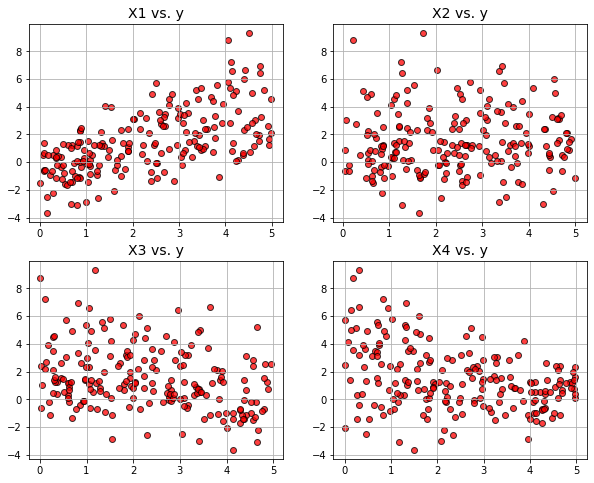

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(df[df.columns[i]],df['y'],edgecolor='k',color='red',alpha=0.75)
    ax[i].set_title(f"{df.columns[i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

### Test/train split

In [ ]:
X = df[['X1','X2','X3','X4']]
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1]:
# IMportant of Random State fixed(random_state=42):
#1- You will select random row order data.
# Give same Random value every time.

### Support vector regressor with linear kernel

Here is scikit-learn's SVR doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train) 

SVR(kernel='linear')

### Test score

In [ ]:
svr_linear.score(X_test,y_test)

0.6956708387854955

### Linear regression as a baseline

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear.score(X_test,y_test)

0.6911519814092009

### Support vector regressor with Gaussian (radial basis function) kernel

In [ ]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train) 

SVR()

In [ ]:
svr_rbf.score(X_test,y_test)

0.7036282692764892

So, clearly, the RBF kernel showed better accuracy on the test set

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test))))

RMSE for linear SVR: 1.203030574254529
RMSE for RBF kernelized SVR: 1.1871983065494902
